In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
np.random.seed(42)

In [9]:
# Slot 1: 10 usd con p=0.40 (si no, 0)
p1, r1 = 0.40, 10.0
# Slot 2: 100 usd con p=0.03 (si no, 0)
p2, r2 = 0.03, 100.0

In [10]:
# Valores esperados teóricos (líneas guía)
ev1 = p1 * r1   # 4.0
ev2 = p2 * r2   # 3.0

In [11]:
# Jugadas y learning rates a probar
n_list = [100, 1000, 10000]  # ← ajuste solicitado: 100, 1000 y 10000
learning_rates = ["1/k", 0.1, 0.01, 0.001]

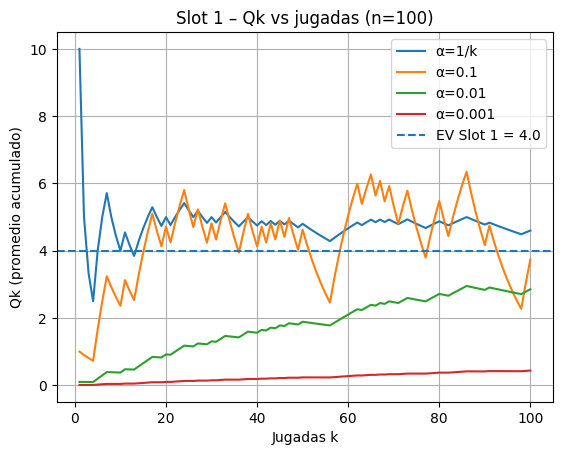

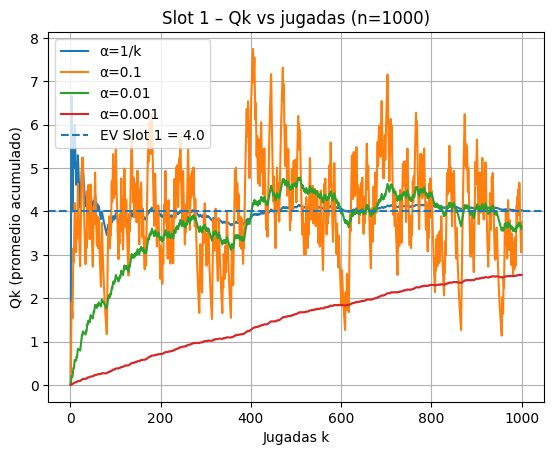

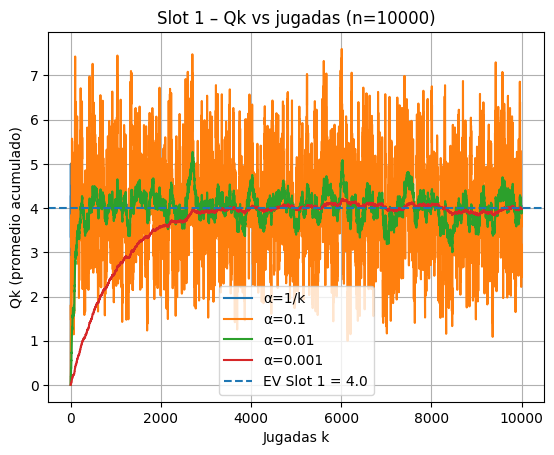

In [12]:
# 2) Simulación y gráficos por caso n
for n in n_list:
    # Preparamos secuencias de recompensas para cada slot
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    recompensas_1 = np.where(u1 < p1, r1, 0.0)
    recompensas_2 = np.where(u2 < p2, r2, 0.0)

    k = np.arange(1, n + 1)  # 1..n

    #SLOT 1
    plt.figure()
    for lr in learning_rates:
        # Cálculo incremental de Qk con el schedule de alpha
        Q = 0.0
        qk = np.zeros(n, dtype=float)
        for i in range(n):
            if lr == "1/k":
                alpha = 1.0 / (i + 1)  # i empieza en 0, k=i+1
            else:
                alpha = lr
            Q = Q + alpha * (recompensas_1[i] - Q)
            qk[i] = Q
        # Dibujar la curva
        etiqueta = f"α=1/k" if lr == "1/k" else f"α={lr}"
        plt.plot(k, qk, label=etiqueta)

    # Línea guía del valor esperado
    plt.axhline(ev1, linestyle='--', label=f'EV Slot 1 = {ev1}')
    plt.title(f'Slot 1 – Qk vs jugadas (n={n})')
    plt.xlabel('Jugadas k')
    plt.ylabel('Qk (promedio acumulado)')
    plt.grid(True)
    plt.legend()

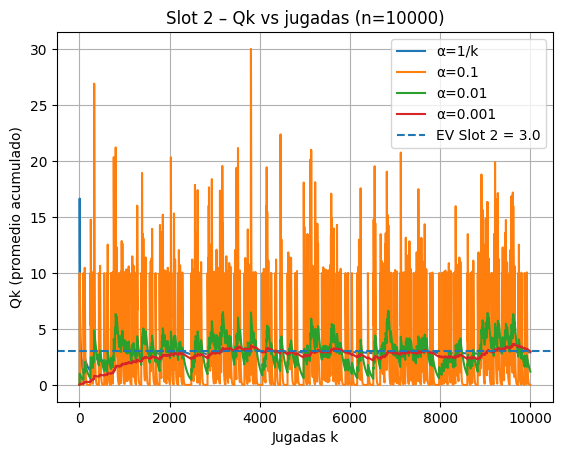

In [13]:
    #  SLOT 2
    plt.figure()
    for lr in learning_rates:
        Q = 0.0
        qk = np.zeros(n, dtype=float)
        for i in range(n):
            if lr == "1/k":
                alpha = 1.0 / (i + 1)
            else:
                alpha = lr
            Q = Q + alpha * (recompensas_2[i] - Q)
            qk[i] = Q
        etiqueta = f"α=1/k" if lr == "1/k" else f"α={lr}"
        plt.plot(k, qk, label=etiqueta)

    plt.axhline(ev2, linestyle='--', label=f'EV Slot 2 = {ev2}')
    plt.title(f'Slot 2 – Qk vs jugadas (n={n})')
    plt.xlabel('Jugadas k')
    plt.ylabel('Qk (promedio acumulado)')
    plt.grid(True)
    plt.legend()

In [14]:
# 3) Plots
plt.show()